# Frequentist Statistics Mini-Project 1b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('../SB_Files/data/insurance2.csv')
%matplotlib inline

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__
- The mean of the charges is 13270.422265141257
    - this value is not very indicative of typical charges
    - the data are skewed, with a few very high values pulling up the mean
    - perhaps the median value would be a better representation of a typical charge
- The std of the charges is 12110.011236693994
    - again, this value is skewed by some very large charges

Text(0, 0.5, 'Number of Observations')

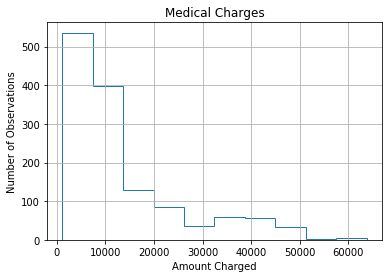

In [4]:
# plot the charges

medical.charges.hist(histtype='step')
plt.title('Medical Charges')
plt.xlabel('Amount Charged')
plt.ylabel('Number of Observations')

In [5]:
print('mean = ', np.mean(medical.charges))
print('std = ', np.std(medical.charges,ddof=1))

mean =  13270.422265141257
std =  12110.011236693994


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__
- The data represent a relatively large sample (1338 observations)
- This sample can be used to approximate with a certain level of confidence what the actual mean is
- The best test for this example would be the t test, as we are unaware of the population standard deviation
    - this would provide a more conservative confidence interval for the result

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__
- A one-sided interval should be used, since we are checking whether or not the actual mean is below a sample mean
- t critical = 1.645
- The administrator should not be concerned, as we are 95% certain the average charge is > 12726

In [6]:
# calculate standard error of the mean
sem = np.std(medical.charges,ddof=1)/np.sqrt(1338)

# calculate the margin of error
moe = 1.645 * sem
print(moe)

544.6059623492973


In [7]:
# use margin of error to calculate 95% confidence interval
print(np.mean(medical.charges) - moe, np.mean(medical.charges) + moe)

12725.81630279196 13815.028227490553


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__
- Null hypothesis: people with insurance are not charged a different amount to those without
- Alternative hypothesis: people with insurance are charged a different amount
- We are assuming the variances between the two groups are the same

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 
- The manual test and scipy test produced the same t statistic of 11.89329903087671
- This value is so high, that the manual p value was returned as 0.0
    - the scipy test returned a value of essentially the same at 4.46e-31
- This result means there is a difference between charges for those with and without insurance
    - we reject the null hypothesis

In [8]:
# divide the groups

ins = medical.query('insuranceclaim == 1')
non = medical.query('insuranceclaim == 0')

# calculate params for calculations
ins_size = len(ins)
non_size = len(non)
ins_std = np.std(ins.charges,ddof=1)
non_std = np.std(non.charges,ddof=1)
mean_ins = np.mean(ins.charges)
mean_non = np.mean(non.charges)

In [9]:
# calculate the pooled sd

sdp = np.sqrt(((ins_size - 1)*(ins_std**2) + (non_size - 1)*(non_std)**2) / (ins_size + non_size - 2))

In [10]:
# calculate the test statistic

t_value = (mean_ins-mean_non) / (sdp * np.sqrt(1/ins_size + 1/non_size))
print('t statistic: ', t_value)

t statistic:  11.89329903087671


In [11]:
# calculate p value

p_value = (1.0 - t.cdf(abs(t_value), (ins_size + non_size - 2))) * 2.0
print('p value: ', p_value)

p value:  0.0


In [12]:
stat, p = scipy.stats.ttest_ind(ins.charges, non.charges)

In [13]:
print(stat, p)

11.893299030876712 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__
- The results are similar, though the t stat is greater and p smaller

In [14]:
stat, p = scipy.stats.ttest_ind(ins.charges, non.charges, equal_var=False)
print(stat, p)

13.298031957975649 1.1105103216309125e-37


__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__
- I only see zmap and zscore for calculating zscores
    - I do not see a test that provides a p value

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test